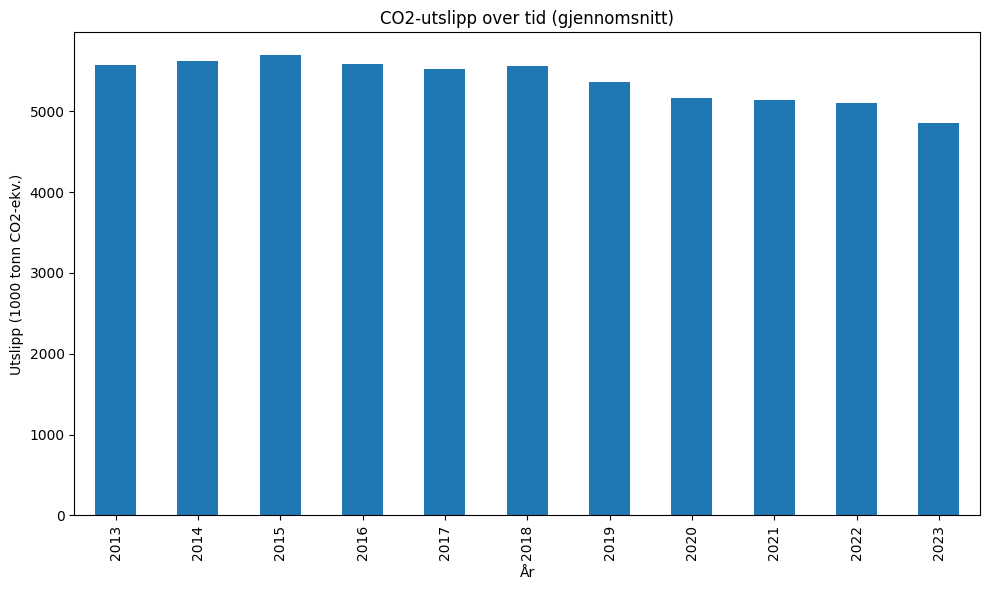

In [1]:
import sys
import pandas as pd
import os

if os.getcwd().split(os.path.sep)[-1] == "processed_data":
    os.chdir("..")

from src.Utslipp import analyze_clean_utslipp_data, plots
from src.Utslipp import plots_part_2 



file_path_utslipp = "raw_data/data/Utslippdata.csv"
df = pd.read_csv(file_path_utslipp)

df_clean = analyze_clean_utslipp_data(df)
plotter = plots(df_clean)

mean = plotter.plot_co2_per_year_mean(  )


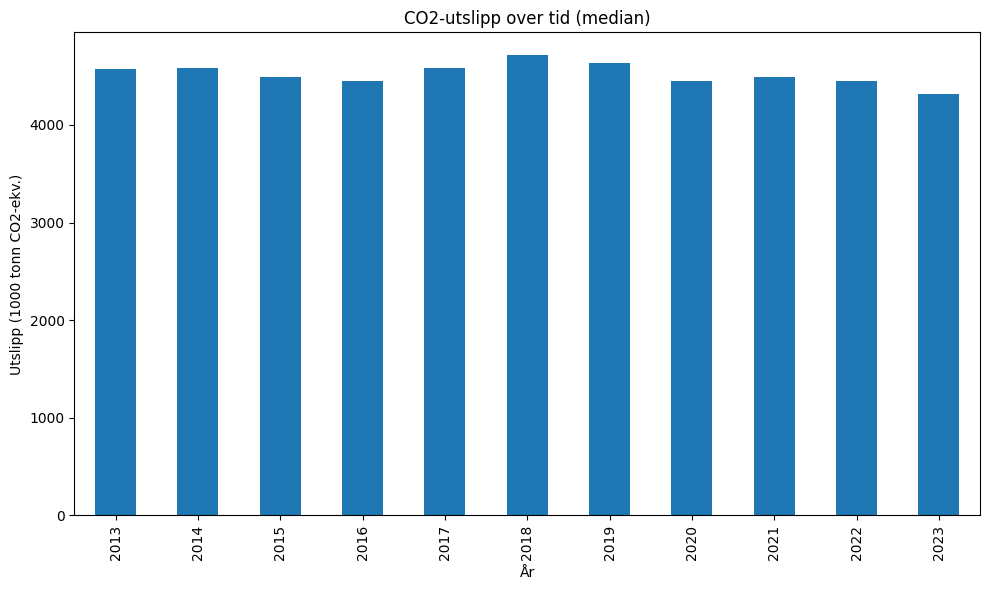

In [2]:
plotter.plot_co2_per_year_median()

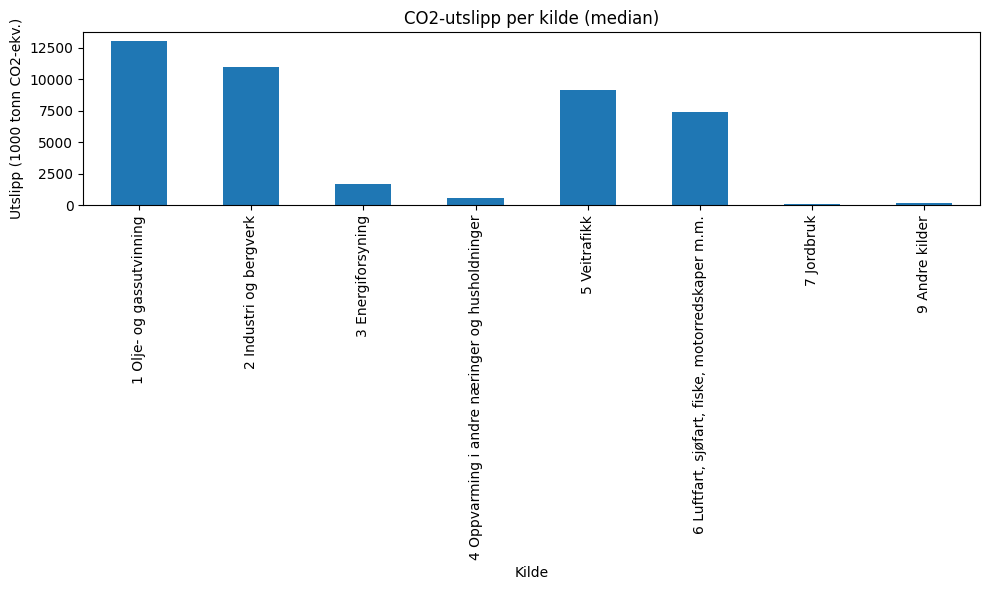

In [3]:
plotter.plot_co2_per_source_median()


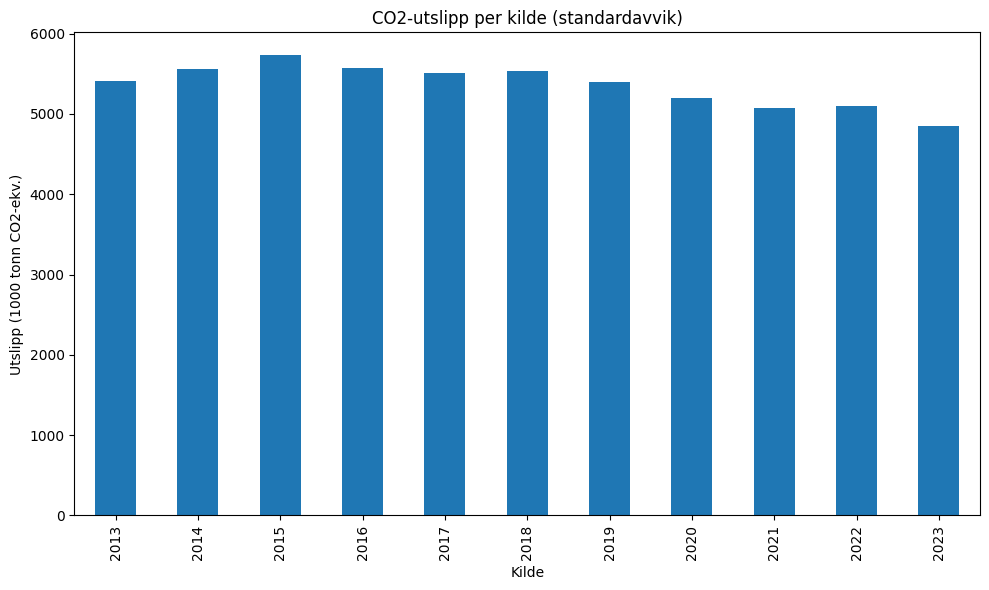

In [4]:
std = plotter.plot_co2_per_year_std()


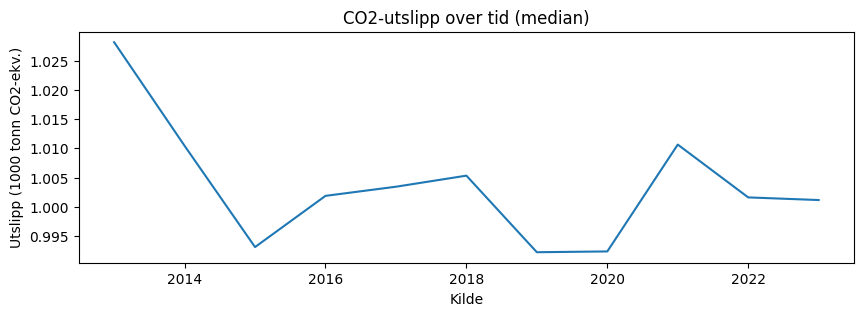

In [5]:
cv = plotter.comparisons(mean, std)


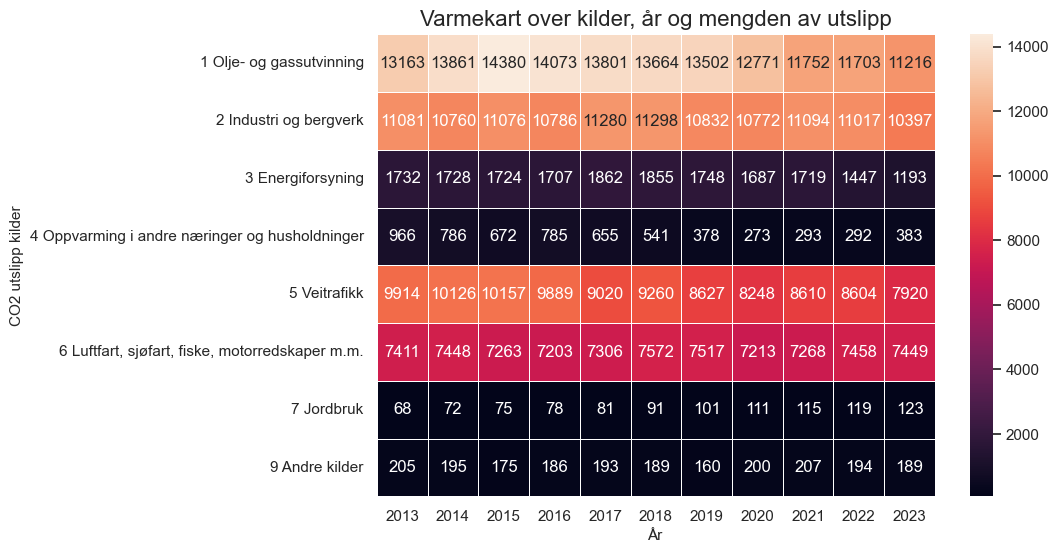

In [6]:
plotter.plot_co2_source_year_hm()


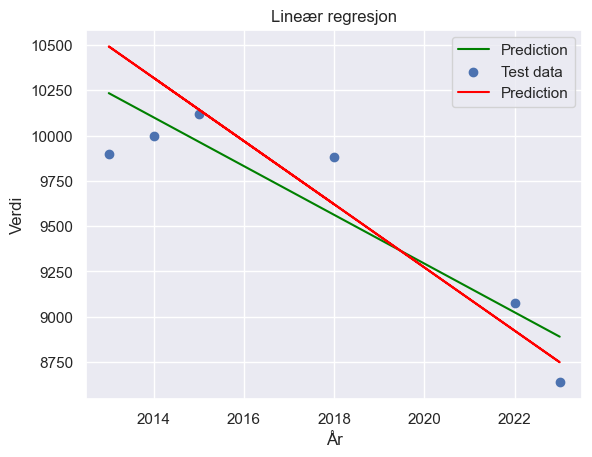

r2 =  0.6870286803599372


,år,verdi
count,99.000000,99.000000
mean,2018.000000,9561.919192
std,3.178371,12829.409832
min,2013.000000,68.000000
25%,2015.000000,335.500000
50%,2018.000000,7411.000000
75%,2021.000000,11087.500000
max,2023.000000,45523.000000


In [7]:
plotters = plots_part_2(df)
plotters.linreg_train_test()

df.describe()


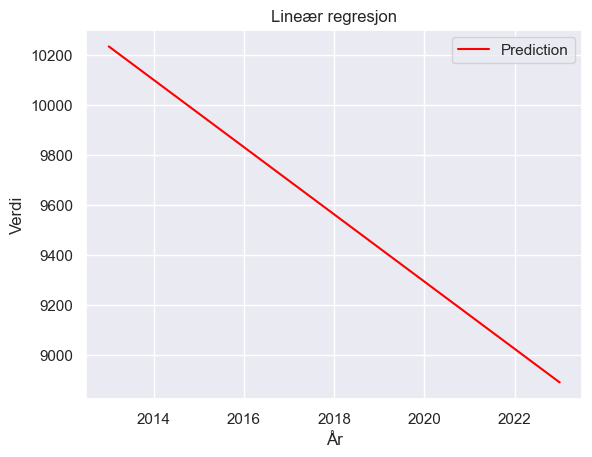

In [8]:
plotters = plots_part_2(df)
plotters.linreg_test()
